In [1]:
%%HTML
<style> code {background-color : pink !important;} </style>

Camera Calibration with OpenCV
===

### Run the code in the cell below to extract object points and image points for camera calibration.  

In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib qt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('calibration_wide/GO*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = mpimg.imread(fname)
    gray = #TODO: convert to grayscale

    # Find the chessboard corners
    ret, corners = #TODO: find chessboard corners

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        #TODO: draw chessboard corners
        
        cv2.imshow('img', img)
        cv2.waitKey(5)
    else:
        print(fname)

cv2.destroyAllWindows()

calibration_wide/GOPR0055.jpg


### If the above cell ran sucessfully, you should now have `objpoints` and `imgpoints` needed for camera calibration.  Run the cell below to calibrate, calculate distortion coefficients, and test undistortion on an image!

[[560.41760742   0.         651.25978911]
 [  0.         561.4620421  499.1270403 ]
 [  0.           0.           1.        ]]
[[-2.32918006e-01  6.16605445e-02 -4.96508649e-05  4.06714298e-05
  -7.53671169e-03]]


Text(0.5, 1.0, 'Undistorted Image')

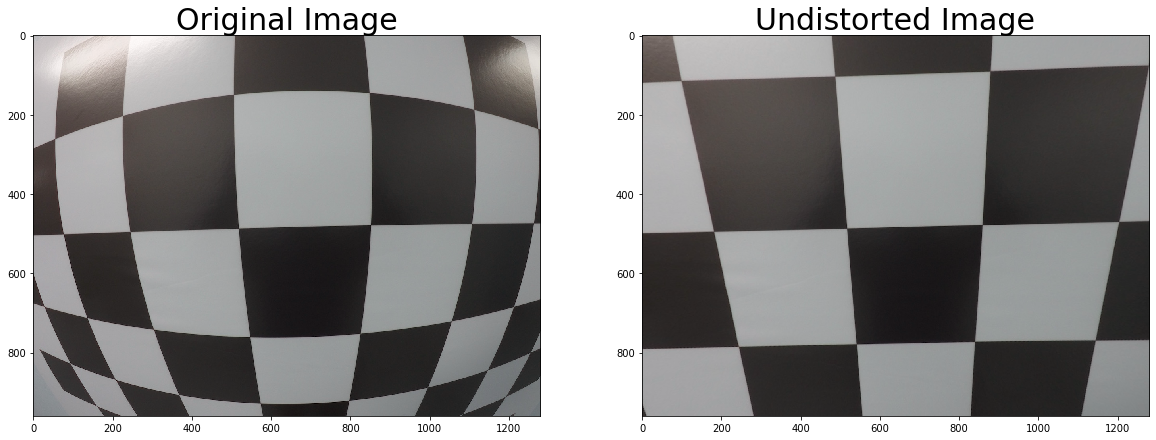

In [3]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = mpimg.imread('calibration_wide/test_image.jpg')[:,:,::-1]
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, K, dist_coeffs, rvecs, tvecs = #TODO: calibrate the camera
print(K)
print(dist_coeffs)

dst = cv2.undistort(img, K, dist_coeffs)
# cv2.imwrite('calibration_wide/test_undist.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["K"] = K
dist_pickle["dist_coeffs"] = dist_coeffs
pickle.dump( dist_pickle, open( "calibration_wide/wide_dist_pickle.p", "wb" ) )
# dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)